# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name_: Chua, Winonna Kylie\
_Student No._: 2022-09120\
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: October 5, 2024 | 11:50 P.M.

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Winonna Kylie C. Chua** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: <font color='red'>**90/100**</font>

Score breakdown:
* Problem 1 - <font color='red'>**27/30**</font>
* Problem 2 - <font color='red'>**27/30**</font>
* Problem 3 - <font color='red'>**36/40**</font>

<font color='red'>**signed GC Belinario**</font>

### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [1]:
import numpy 
from numpy import array, diag, matmul
import numpy.linalg 
from numpy.linalg import eigh, norm

In [10]:
# 1: Finding the eigenvalues and eigenvectors of A

A = array([[8, -2, -20], [-2, -3, -9], [-20, -9, -3]])        # defining the matrix A
x, V = eigh(A)                                                # finding the eigenvalues and eigenvectors of A (eigh is used since the matrix A is symmetric)

print("1.")
print(f"The eigenvalues of A: {x}")             # displayes the eigenvalues
print("")
print("The eigenvectors of A:")
print(V)                                        # displays the eigenvectors
print("")

#2: Checking if AV = VD

print("2.")
D = array(diag(x))                    # defining the matrix D (which has the eigenvalues as the diagonal entries)
AV = matmul(A, V)                     # multiplication of matrix A and matrix V
VD = matmul(V, D)                     # multiplication of matrix V and matrix D
norm1 = norm(AV - VD)                 # finding the norm of AV-VD to calculate the Frobenius norm
norm2 = norm(VD)                      # finding the norm of VD to calculate the Frobenius norm
error = (norm1 / norm2)*100           # Frobenius norm to calculate error

print(f"Using Frobenius norm, the error is approximated to be {error}. Since the error value is very small, we can conclude that AV is") 
print("approximately equal to VD.")

1.
The eigenvalues of A: [-21.99606195   0.16021522  23.83584674]

The eigenvectors of A:
[[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]

2.
Using Frobenius norm, the error is approximated to be 4.529625936454272e-14. Since the error value is very small, we can conclude that AV is
approximately equal to VD.


<font color=red> Must explain why Frobenius norm was used to verify the numerical correctness of the obtained eigenvalues and eigenvectors. </font>

<font color=red>Correctness of Code: 15/15</font> \
<font color=red>Discussion of Code and Results: 12/15 </font>

### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

In [2]:
import math
from math import exp
import numpy
from numpy import arange
import matplotlib.pyplot as plt

1.
When c=2, x = 0.7968126311118457 with an accuracy of at least 10^-6.

2.


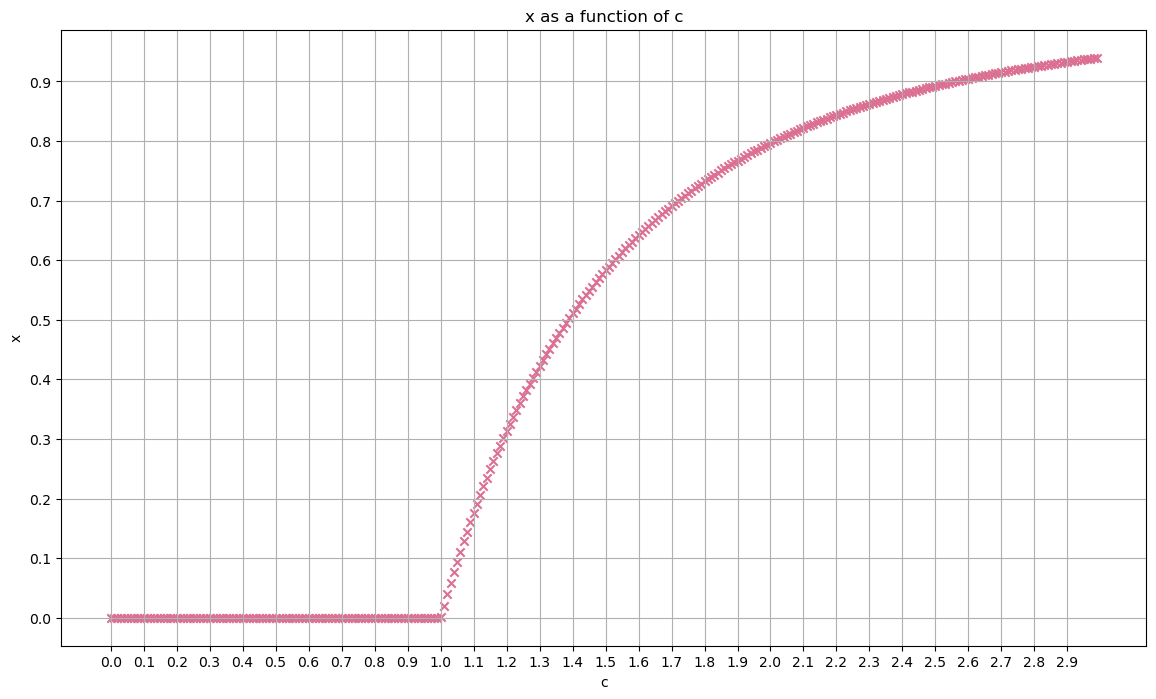

In [3]:
#1: Finding x when c=2 using the relaxation method 

def relax(c):                           # defining the relaxation method
    x_0 = 1.0                           # estimate (starting value)
    x_n = x_0                           # setting x_n to be equal to the starting value
    for k in range(1000):               # 1000 is set to be the maximum # of iterations
        x = 1 - exp(-c*x_n)             # given equation
        if abs(x - x_n) < 1e-6:         # to establish accuracy of at least 10^-6
            return x 
        x_n = x                         # the value of x_n is updated 
    return x_n 
c = 2.0                                 # given value of c
result_1 = relax(c)                     # sets result_1 as the value of x when c=2 using the defined relaxation method
print("1.")
print(f"When c=2, x = {result_1} with an accuracy of at least 10^-6.")
print("")

#2: Finding the values of x when c has the values from 0 to 3 in steps of 0.01

c_n = arange(0, 3, 0.01)                # c ranges from 0 to 3 in intervals of 0.01
values = []                             # empty list to store the values of x
for c in c_n:
    result_2 = relax(c)                 # sets result_2 as the value of x from the corresponding value of c (using the defined relaxation method)
    values.append(result_2)             # adding the value of result_2 to the list entitled "values"

#3: Plotting x as a function of c
print("2.")

plt.figure(figsize=(14, 8))                                         # increasing the figure size to explicitly show the values
plt.title("x as a function of c")                                   # setting the plot title
plt.scatter(c_n, values, color = 'palevioletred', marker = 'x')     # scatter plot of c_n and values
plt.xticks(arange(0, 3, 0.1))                                       # setting the ticks in x-axis to range from 0 to 3 in intervals of 0.1
plt.yticks(arange(0, 1, 0.1))                                       # setting the ticks in y-axis to range from 0 to 1 in intervals of 0.1
plt.xlabel("c")                                                     # setting the label for x-axis 
plt.ylabel("x")                                                     # setting the label for y-axis 
plt.grid()                                                          # adds grids to the plot
plt.show()                                                          # displays the plot

**Discussion of Results**

1. When c ranges from 0 to 1, the value of x is constant (approximately 0).
2. When c ranges from 1 to 3, the value of x gradually increases and almost approaches 1.

<font color=red> The description of the change in </font>  $x$  <font color=red> is inaccurate. </font>

<font color=red>Correctness of Code: 15/15</font> \
<font color=red>Discussion of Code and Results: 12/15 </font>

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

In [4]:
# Values of constants
G = 6.674 * 1e-11       # Newton's gravitational constant [units: (m**3)*(kg**-1)*(s**-2)]
M = 5.974 * 1e24        # Earth's mass [units: kg]
m = 7.348 * 1e22        # Moon's mass [units: kg]
R = 3.844 * 1e8         # Distance from the Earth to the Moon [units: m]
w = 2.662 * 1e-6        # Angular velocity of both the moon and the satellite [units: (s**-1)]

# Defining Newton's method 
def newton(func, funcderiv, r_n):    # function for Newton's method with 3 entries (func=function, funcderiv=derivative of function, r_n=estimate value of r)
    def f(r_n):                      # defining function f using func
        f = eval(func)
        return f
        
    def df(r_n):                     # defining function df using funcderiv
        df = eval(funcderiv)
        return df

    r_0 = r_n                            # setting r_0 to be equal to the estimate value
    r = r_n - (f(r_n)/df(r_n))           # formula for Newton's method
    while abs(r - r_0) > 1e4:            # to establish accuracy of at least 4 sig figs
        r, r_0 = r - (f(r)/df(r)), r     # updates the values of r and r_0
    return r
    
# Finding r using Newton's Method using the given function with r_n = 3e6 (in the interval [0,R], but is closer to R)
result = newton("(G*M*((r_n)**-2) - G*m*((R-r_n)**-2) - (w**2)*r_n)", "(-2*G*M*((r_n)**-3) - 2*G*m*((R-r_n)**-3) - w**2)", 3e6)
print(f"The distance r from the Earth to the L_1 point is {result}, accurate to at least 4 siginificant figures.")

The distance r from the Earth to the L_1 point is 326045071.665357, accurate to at least 4 siginificant figures.


<font color=red> The reported answer lacks the appropriate physical units. </font>

<font color=red>Correctness of Code: 20/20 </font> \
<font color=red>Discussion of Code and Results: 16/20 </font>